In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
class AE:
    def __init__(self, fitness_function, dimensions,
                 population_size=25, mutation_rate=0.1,
                 sigma=0.1, lower_bound=-10, upper_bound=10):
        self.fitness_function = fitness_function
        self.dimensions = dimensions
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.sigma = sigma
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
        self.population = self.initialize_population()
        self.best_individual = None
        self.best_fitness = float('inf')
        self.history = []

    def initialize_population(self):
        return np.random.uniform(self.lower_bound, self.upper_bound,
                                    size=(self.population_size, self.dimensions))
    
    def evaluate_fitness(self, population):
        return np.array([self.fitness_function(ind) for ind in population])
    
    def tournament_selection(self, population, fitness_values, tournament_size=3):
        selected_indices = np.random.choice(len(population), size=tournament_size, replace=False)
        best_index = selected_indices[np.argmin(fitness_values[selected_indices])]
        return population[best_index]
    
    def one_point_crossover(self, parent1, parent2):
        point = np.random.randint(1, self.dimensions)
        child1 = np.concatenate([parent1[:point], parent2[point:]])
        child2 = np.concatenate([parent2[:point], parent1[point:]])
        return child1, child2
    
    def gaussian_mutation(self, individual):
            mutant = np.copy(individual)
            for i in range(self.dimensions):
                if np.random.rand() < self.mutation_rate:
                    mutant[i] += np.random.normal(0, self.sigma)
            return mutant
    
    def get_history(self):
        return np.array(self.history)
    
    def run(self, generations=100, verbose=True):
        population = self.population

        for gen in range(generations):
            fitness_values = self.evaluate_fitness(population)
            new_population = []

            while len(new_population) < self.population_size:
                parent1 = self.tournament_selection(population, fitness_values)
                parent2 = self.tournament_selection(population, fitness_values)
                child1, child2 = self.one_point_crossover(parent1, parent2)
                child1 = self.gaussian_mutation(child1)
                child2 = self.gaussian_mutation(child2)
                new_population.extend([child1, child2])

            population = np.array(new_population[:self.population_size])
            self.best_fitness = np.min(self.evaluate_fitness(population))
            self.best_individual = population[np.argmin(fitness_values)]
            self.history.append(self.best_fitness)
            if verbose:
                print(f"Generation {gen}: Best function value = {self.best_fitness:.8f}")

        final_fitness = self.evaluate_fitness(population)
        best_index = np.argmin(final_fitness)
        return population[best_index], final_fitness[best_index]

## 3D quadratic function

In [3]:
def quadratic_function(ind):
    x, y, z = ind
    return x**2 + y**2 + 2 * z**2

Generation 0: Best function value = 15.78507714
Generation 1: Best function value = 7.85082035
Generation 2: Best function value = 7.85082035
Generation 3: Best function value = 7.39244173
Generation 4: Best function value = 7.21992193
Generation 5: Best function value = 6.66454430
Generation 6: Best function value = 6.53220479
Generation 7: Best function value = 6.35120509
Generation 8: Best function value = 5.91623192
Generation 9: Best function value = 5.62065149
Generation 10: Best function value = 5.16223726
Generation 11: Best function value = 4.80309379
Generation 12: Best function value = 4.71246997
Generation 13: Best function value = 4.70428777
Generation 14: Best function value = 4.68644040
Generation 15: Best function value = 4.47397586
Generation 16: Best function value = 4.09945031
Generation 17: Best function value = 3.85421248
Generation 18: Best function value = 3.82813693
Generation 19: Best function value = 3.73331601
Generation 20: Best function value = 3.26911098
G

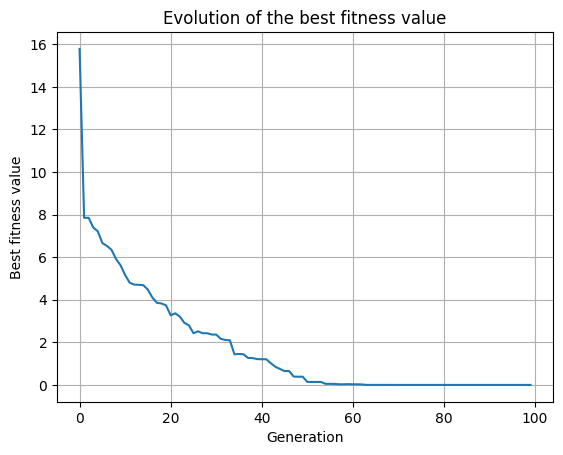

In [37]:
model1 = AE(
    fitness_function=quadratic_function,
    dimensions=3,
    population_size=25,
    mutation_rate=0.1,
    sigma=0.1,
    lower_bound=-10,
    upper_bound=10
)
best_solution, best_fitness = model1.run(generations=100, verbose=True)
history = model1.get_history()
print(f'Best solution: {np.round(best_solution, 4)}, function value: {best_fitness}')

plt.plot(history)
plt.title('Evolution of the best fitness value')
plt.xlabel('Generation')
plt.ylabel('Best fitness value')
plt.grid()
plt.show()

## Rastrigin function

In [23]:
def rastrigin_function(ind):
    A = 10
    n = len(ind)
    return A * n + sum([(x**2 - A * np.cos(2 * np.pi * x)) for x in ind])

Population size 25: Best solution: [ 1.9000e-03  6.0000e-04  9.9400e-01  1.9904e+00 -1.9000e-03], function value: 4.976550928527935
Population size 50: Best solution: [ 9.949e-01 -9.942e-01  3.000e-04  2.000e-04 -9.915e-01], function value: 2.987432313159502
Population size 75: Best solution: [ 1.000e-04 -9.945e-01 -3.000e-04 -7.000e-04 -9.950e-01], function value: 1.9900700061840126
Population size 100: Best solution: [-0.0004  0.0004  0.0003  0.0005  0.0008], function value: 0.00028688785563701913


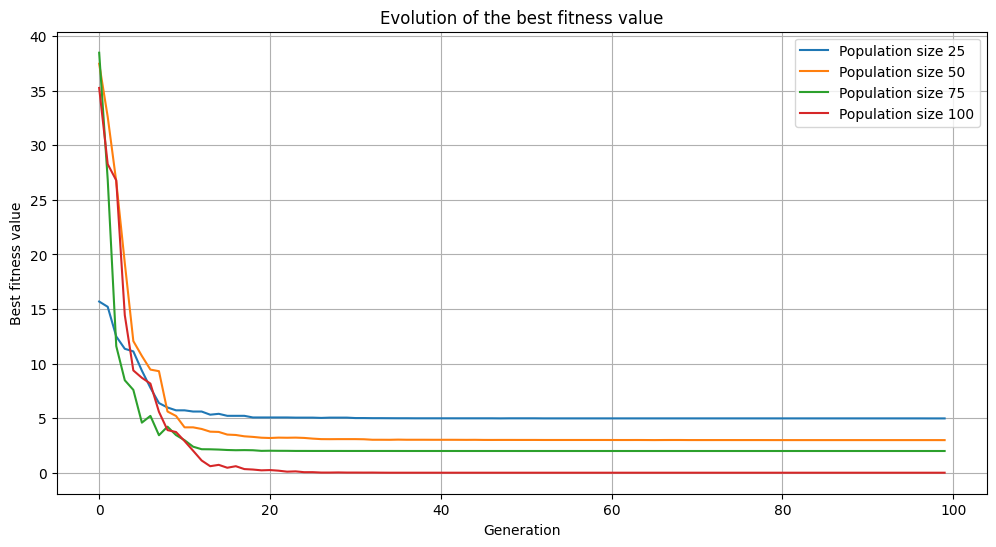

In [40]:
pop_sizes = [25, 50, 75, 100]
histories = []
for pop_size in pop_sizes:
    model2 = AE(
        fitness_function=rastrigin_function,
        dimensions=5,
        population_size=pop_size,
        mutation_rate=0.1,
        sigma=0.1,
        lower_bound=-5.12,
        upper_bound=5.12
    )
    best_solution, best_fitness = model2.run(generations=100, verbose=False)
    histories.append(model2.get_history())
    print(f'Population size {pop_size}: Best solution: {np.round(best_solution, 4)}, function value: {best_fitness}')

plt.figure(figsize=(12, 6))
for i, history in enumerate(histories):
    plt.plot(history, label=f'Population size {pop_sizes[i]}')
plt.title('Evolution of the best fitness value')
plt.xlabel('Generation')
plt.ylabel('Best fitness value')
plt.legend()
plt.grid()
plt.show()